
# Spatial interpolation of the given test points

In [89]:
import xlrd
from folium import plugins
import geojsoncontour
import scipy as sp
import scipy.ndimage
import scipy as sp
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates
import folium
from scipy.interpolate import Rbf
import xarray as xr
import pandas as pd
import numpy as np

In [282]:
aa = pd.read_csv('C:/Users/IITM/Desktop/Datathon/Sample output/POLLUTION_TEST_POINTS.csv')

In [332]:
#===========================================

0


c:\users\iitm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1
2
3
4


c:\users\iitm\appdata\local\programs\python\python37\lib\site-packages\geojsoncontour\utilities\multipoly.py:33: RuntimeWarning: invalid value encountered in true_divide
  return vector / np.linalg.norm(vector)


5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


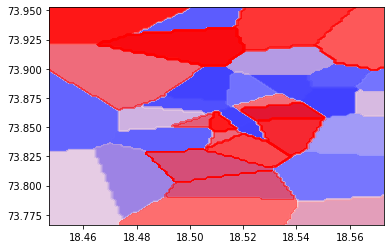

In [389]:

zz = pd.DataFrame([])

for iii in range(0,50):
    
    print(iii)
    lat_req = aa['Latitude'][iii]
    lon_req = aa['Longitude'][iii]


    dd = pd.to_datetime(aa['StartDateTime'][iii])
    ff = pd.to_datetime(aa['EndDateTime'][iii])

    st = pd.to_datetime(dd.strftime('%Y-%m-%d %H:%M:%S'))
    en = pd.to_datetime(ff.strftime('%Y-%m-%d %H:%M:%S'))

    file_name =  pd.read_excel("C:\\Users\IITM\Desktop\Datathon\Final\LatsLons1.xlsx")
    z  = pd.DataFrame([])
    for i in range(0,35):

        lats = file_name['Latitude'][i]
        lons = file_name['Longitude'][i]

        stations = file_name['Stations'][i]

        try:
            gg = pd.read_csv("C:/Users/IITM/Desktop/Datathon/Final/"+ stations +".txt",'\t')
        except:
            gg = pd.read_csv("C:/Users/IITM/Desktop/Datathon/Final/"+ stations +".csv",'\t')

        ff = pd.date_range('2019-04-01 00:00:00','2019-10-30 00:00:00',freq='1H')

        gg = gg.iloc[0:len(ff),:]

        gg.index = ff

        gg_req = gg[(gg.index >= st) & (gg.index <= en)]
        #print(gg_req)

        fff = gg_req.iloc[-1,4:6]
        #print(i,stations,fff,lats)

        try:
            cc = pd.DataFrame({'Datetime':[en],'pm2max':[fff['PM2MAX']],'pm2min':[fff['PM2MIN']],
                           'name':[stations],'lat':[lats],'lons':[lons]})
        except:
            cc = pd.DataFrame({'Datetime':[en],'pm2max':[fff['PM2_MAX']],'pm2min':[fff['PM2_MIN']],
                           'name':[stations],'lat':[lats],'lons':[lons]})
        z = z.append(cc)
        #print(z['pm2max'])

    zs = z[['pm2max']]
    c1 = z.lat.values
    c2 = z.lons.values

    x_orig = c2
    y_orig = c1

    geomap = folium.Map([y_orig.mean(), x_orig.mean()], zoom_start=13, tiles="cartodbpositron")

        # Make lat and lon linspace
    y_arr = np.linspace(np.min(y_orig), np.max(y_orig), 100)
    x_arr = np.linspace(np.min(x_orig), np.max(x_orig), 100)
        # Make mesh grid
    x_mesh, y_mesh = np.meshgrid(x_arr, y_arr)


        # Perform nearest interpolation
    z_mesh = griddata((x_orig, y_orig), zs.values, (x_mesh, y_mesh), method='nearest')
        #rbf = Rbf(x_orig, y_orig, zs, epsilon=3)
        #ZI = rbf(x_mesh, y_mesh)
        # Number of levels of colors
    levels = 20
        # Make contours of the fird value obtained in z_mesh
    contourf = plt.contourf(x_mesh, y_mesh, z_mesh[:,:,0], levels, alpha=0.5, cmap="bwr", linestyles='None', vmin=0, vmax=100)

        # Convert matplotlib contourf to geojson
    geojson = geojsoncontour.contourf_to_geojson(
            contourf=contourf,
            min_angle_deg=3.0,
            ndigits=5,
            stroke_width=1,
            fill_opacity=0.5)

        # Plot the contour plot on folium
    folium.GeoJson(
            geojson,
            style_function=lambda x: {
                'color':     x['properties']['stroke'],
                'weight':    x['properties']['stroke-width'],
                'fillColor': x['properties']['fill'],
                'opacity':   0.6,
            }).add_to(geomap)

        # Show map
    geomap

    foo = xr.DataArray(z_mesh[:,:,0], coords=[np.round(x_arr,3), np.round(y_arr,3)], dims=['lat', 'lon'])
    bb  = aa.iloc[iii:iii+1,:]

    bb['PM2MAX'] = float(foo.sel(lat=lat_req,lon=lon_req,method='nearest').values)
    zz = zz.append(bb)


0


c:\users\iitm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


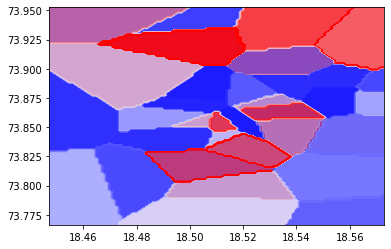

In [382]:
zzz = pd.DataFrame([])

for iii in range(0,50):
    
    print(iii)
    lat_req = aa['Latitude'][iii]
    lon_req = aa['Longitude'][iii]


    dd = pd.to_datetime(aa['StartDateTime'][iii])
    ff = pd.to_datetime(aa['EndDateTime'][iii])

    st = pd.to_datetime(dd.strftime('%Y-%m-%d %H:%M:%S'))
    en = pd.to_datetime(ff.strftime('%Y-%m-%d %H:%M:%S'))

    file_name =  pd.read_excel("C:\\Users\IITM\Desktop\Datathon\Final\LatsLons1.xlsx")
    z  = pd.DataFrame([])
    for i in range(0,35):

        lats = file_name['Latitude'][i]
        lons = file_name['Longitude'][i]

        stations = file_name['Stations'][i]

        try:
            gg = pd.read_csv("C:/Users/IITM/Desktop/Datathon/Final/"+ stations +".txt",'\t')
        except:
            gg = pd.read_csv("C:/Users/IITM/Desktop/Datathon/Final/"+ stations +".csv",'\t')

        ff = pd.date_range('2019-04-01 00:00:00','2019-10-30 00:00:00',freq='1H')

        gg = gg.iloc[0:len(ff),:]

        gg.index = ff

        gg_req = gg[(gg.index >= st) & (gg.index <= en)]
        #print(gg_req)
        
        try:
            fff = gg_req.iloc[-2,4:6]
        except:
            fff = gg_req.iloc[-1,4:6]
        #print(fff['PM2MIN'] == np.NaN)
        
        #print(fff)
        #print(i,stations,fff,lats)

        try:
            cc = pd.DataFrame({'Datetime':[en],'pm2max':[fff['PM2MAX']],'pm2min':[fff['PM2MIN']],
                           'name':[stations],'lat':[lats],'lons':[lons]})
        except:
            cc = pd.DataFrame({'Datetime':[en],'pm2max':[fff['PM2_MAX']],'pm2min':[fff['PM2_MIN']],
                           'name':[stations],'lat':[lats],'lons':[lons]})
        z = z.append(cc)
        #print(z['pm2max'])

    zs = z[['pm2min']]
    c1 = z.lat.values
    c2 = z.lons.values

    x_orig = c2
    y_orig = c1

    geomap = folium.Map([y_orig.mean(), x_orig.mean()], zoom_start=13, tiles="cartodbpositron")

        # Make lat and lon linspace
    y_arr = np.linspace(np.min(y_orig), np.max(y_orig), 100)
    x_arr = np.linspace(np.min(x_orig), np.max(x_orig), 100)
        # Make mesh grid
    x_mesh, y_mesh = np.meshgrid(x_arr, y_arr)


        # Perform nearest interpolation
    z_mesh = griddata((x_orig, y_orig), zs.values, (x_mesh, y_mesh), method='nearest')
        #rbf = Rbf(x_orig, y_orig, zs, epsilon=3)
        #ZI = rbf(x_mesh, y_mesh)
        # Number of levels of colors
    levels = 20
        # Make contours of the fird value obtained in z_mesh
    contourf = plt.contourf(x_mesh, y_mesh, z_mesh[:,:,0], levels, alpha=0.5, cmap="bwr", linestyles='None', vmin=0, vmax=100)

        # Convert matplotlib contourf to geojson
    geojson = geojsoncontour.contourf_to_geojson(
            contourf=contourf,
            min_angle_deg=3.0,
            ndigits=5,
            stroke_width=1,
            fill_opacity=0.5)

        # Plot the contour plot on folium
    folium.GeoJson(
            geojson,
            style_function=lambda x: {
                'color':     x['properties']['stroke'],
                'weight':    x['properties']['stroke-width'],
                'fillColor': x['properties']['fill'],
                'opacity':   0.6,
            }).add_to(geomap)

        # Show map
    geomap

    foo = xr.DataArray(z_mesh[:,:,0], coords=[np.round(x_arr,3), np.round(y_arr,3)], dims=['lat', 'lon'])
    bd  = aa.iloc[iii:iii+1,:]

    bd['PM2MIN'] = float(foo.sel(lat=lat_req,lon=lon_req,method='nearest').values)
    zzz = zzz.append(bd)


In [384]:
out_result = zz

In [385]:
out_result['PM2MIN'] = zzz['PM2MIN']

In [388]:
out_result.to_csv('C:/Users/IITM/Desktop/Datathon/Sample output/out_result.csv')

In [291]:
#=================================